In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
pd.options.display.max_columns =24
import datetime as dt
import colorsys
import pylab as pl


import plotly
from ipywidgets import widgets
from IPython.display import display
import plotly.graph_objs as go
from plotly.widgets import GraphWidget


<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("/Users/dekuwinekogda/Desktop/Datascience/Gun-violence-analysis/dataset/gun-violence-data_01-2013_03-2018.csv", encoding = "ISO-8859-1")

In [3]:
df

incident_id        date                 state  \
0            461105  2013-01-01          Pennsylvania   
1            460726  2013-01-01            California   
2            478855  2013-01-01                  Ohio   
3            478925  2013-01-05              Colorado   
4            478959  2013-01-07        North Carolina   
5            478948  2013-01-07              Oklahoma   
6            479363  2013-01-19            New Mexico   
7            479374  2013-01-21             Louisiana   
8            479389  2013-01-21            California   
9            492151  2013-01-23              Maryland   
10           491674  2013-01-23             Tennessee   
11           479413  2013-01-25              Missouri   
12           479561  2013-01-26             Louisiana   
13           479554  2013-01-26  District of Columbia   
14           479460  2013-01-26                  Ohio   
15           479573  2013-02-02             Tennessee   
16           479580  2013-02-03            California   
17           479592  2013-02-07              Illinois   
18           479603  2013-02-09             Louisiana   
19           480311  2013-02-11            California   
20           480327  2013-02-11              Delaware   
21           480344  2013-02-12                  Utah   
22           480358  2013-02-19            California   
23           480383  2013-02-21              Oklahoma   
24           480401  2013-02-22              Michigan   
25           480407  2013-02-23            California   
26           480443  2013-02-24               Georgia   
27           481186  2013-03-02             Louisiana   
28           481198  2013-03-03               Georgia   
29           481208  2013-03-03              Michigan   
30           481213  2013-03-04            California   
31           481220  2013-03-05               Indiana   
32           481229  2013-03-07           Mississippi   
33           481237  2013-03-10              Missouri   
34           482771  2013-03-11  District of Columbia   
35           482801  2013-03-13            California   
36           482856  2013-03-13              New York   
37           482838  2013-03-14            California   
38           482926  2013-03-16            California   
39           482934  2013-03-17            California   
40           482942  2013-03-17               Florida   
41           483737  2013-03-21              Illinois   
42           483765  2013-03-21              Missouri   
43           483788  2013-03-22              New York   
44           483835  2013-03-30            California   
45           483817  2013-03-31            Washington   
46           483861  2013-04-06        South Carolina   
47           483872  2013-04-07              New York   
48           483878  2013-04-07            California   
49           484268  2013-04-09          Pennsylvania   
50           484279  2013-04-10            California   
51           484307  2013-04-14               Arizona   
52           484287  2013-04-14              Kentucky   
53           484317  2013-04-18                  Ohio   
54           484333  2013-04-21            Washington   
55           484351  2013-04-22              Illinois   
56           485746  2013-04-22             Louisiana   
57           485811  2013-04-24              Illinois   
58           489185  2013-04-25                  Ohio   
59           485821  2013-04-27               Florida   
60           485874  2013-04-28        North Carolina   
61           485885  2013-04-28          Pennsylvania   
62           485979  2013-04-28             Tennessee   
63           984353  2013-05-02              Maryland   
64           486005  2013-05-02            New Jersey   
65           486027  2013-05-04        North Carolina   
66           486056  2013-05-05            California   
67           486068  2013-05-06          Pennsylvania   
68           486109  2013-05-10            California   
69           48614

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                    

In [5]:
df.shape

(239677, 29)

In [6]:
df.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000

In [7]:
df_duplicates = df.drop_duplicates()
df_duplicates.shape

(239677, 29)

In [8]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

address                      16497
source_url                     468
congressional_district       11944
gun_stolen                   99498
gun_type                     99451
incident_characteristics       326
latitude                      7923
location_description        197588
longitude                     7923
n_guns_involved              99451
notes                        81017
participant_age              92298
participant_age_group        42119
participant_gender           36362
participant_name            122253
participant_relationship    223903
participant_status           27626
participant_type             24863
sources                        609
state_house_district         38772
state_senate_district        32335
dtype: int64

In [9]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        239677 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239677 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         239677 non-null float64
gun_stolen                     239677 non-null object
gun_type                       239677 non-null object
incident_characteristics       239677 non-null object
latitude                       239677 non-null float64
location_description           239677 non-null object
longitude                   

In [10]:
df['str_split'] = df.date.str.split('-')
df['year'] = df.str_split.str.get(0)
df['months'] = df.str_split.str.get(1)
df['day'] = df.str_split.str.get(2)

df 
# print(df.head(100))

incident_id        date                 state  \
0            461105  2013-01-01          Pennsylvania   
1            460726  2013-01-01            California   
2            478855  2013-01-01                  Ohio   
3            478925  2013-01-05              Colorado   
4            478959  2013-01-07        North Carolina   
5            478948  2013-01-07              Oklahoma   
6            479363  2013-01-19            New Mexico   
7            479374  2013-01-21             Louisiana   
8            479389  2013-01-21            California   
9            492151  2013-01-23              Maryland   
10           491674  2013-01-23             Tennessee   
11           479413  2013-01-25              Missouri   
12           479561  2013-01-26             Louisiana   
13           479554  2013-01-26  District of Columbia   
14           479460  2013-01-26                  Ohio   
15           479573  2013-02-02             Tennessee   
16           479580  2013-02-03            California   
17           479592  2013-02-07              Illinois   
18           479603  2013-02-09             Louisiana   
19           480311  2013-02-11            California   
20           480327  2013-02-11              Delaware   
21           480344  2013-02-12                  Utah   
22           480358  2013-02-19            California   
23           480383  2013-02-21              Oklahoma   
24           480401  2013-02-22              Michigan   
25           480407  2013-02-23            California   
26           480443  2013-02-24               Georgia   
27           481186  2013-03-02             Louisiana   
28           481198  2013-03-03               Georgia   
29           481208  2013-03-03              Michigan   
30           481213  2013-03-04            California   
31           481220  2013-03-05               Indiana   
32           481229  2013-03-07           Mississippi   
33           481237  2013-03-10              Missouri   
34           482771  2013-03-11  District of Columbia   
35           482801  2013-03-13            California   
36           482856  2013-03-13              New York   
37           482838  2013-03-14            California   
38           482926  2013-03-16            California   
39           482934  2013-03-17            California   
40           482942  2013-03-17               Florida   
41           483737  2013-03-21              Illinois   
42           483765  2013-03-21              Missouri   
43           483788  2013-03-22              New York   
44           483835  2013-03-30            California   
45           483817  2013-03-31            Washington   
46           483861  2013-04-06        South Carolina   
47           483872  2013-04-07              New York   
48           483878  2013-04-07            California   
49           484268  2013-04-09          Pennsylvania   
50           484279  2013-04-10            California   
51           484307  2013-04-14               Arizona   
52           484287  2013-04-14              Kentucky   
53           484317  2013-04-18                  Ohio   
54           484333  2013-04-21            Washington   
55           484351  2013-04-22              Illinois   
56           485746  2013-04-22             Louisiana   
57           485811  2013-04-24              Illinois   
58           489185  2013-04-25                  Ohio   
59           485821  2013-04-27               Florida   
60           485874  2013-04-28        North Carolina   
61           485885  2013-04-28          Pennsylvania   
62           485979  2013-04-28             Tennessee   
63           984353  2013-05-02              Maryland   
64           486005  2013-05-02            New Jersey   
65           486027  2013-05-04        North Carolina   
66           486056  2013-05-05            California   
67           486068  2013-05-06          Pennsylvania   
68           486109  2013-05-10            California   
69           48614

In [11]:
df1= df[['year', 'state','city_or_county','incident_id','n_killed','n_injured']]
df1

year                 state                           city_or_county  \
0       2013          Pennsylvania                               Mckeesport   
1       2013            California                                Hawthorne   
2       2013                  Ohio                                   Lorain   
3       2013              Colorado                                   Aurora   
4       2013        North Carolina                               Greensboro   
5       2013              Oklahoma                                    Tulsa   
6       2013            New Mexico                              Albuquerque   
7       2013             Louisiana                              New Orleans   
8       2013            California                                Brentwood   
9       2013              Maryland                                Baltimore   
10      2013             Tennessee                              Chattanooga   
11      2013              Missouri                              Saint Louis   
12      2013             Louisiana                                Charenton   
13      2013  District of Columbia                               Washington   
14      2013                  Ohio                              Springfield   
15      2013             Tennessee                                  Memphis   
16      2013            California                            Yuba (county)   
17      2013              Illinois                                  Chicago   
18      2013             Louisiana                              New Orleans   
19      2013            California                                  Vallejo   
20      2013              Delaware                               Wilmington   
21      2013                  Utah                                  Midvale   
22      2013            California                          Orange (county)   
23      2013              Oklahoma                                    Tulsa   
24      2013              Michigan                             Grand Rapids   
25      2013            California                                Lancaster   
26      2013               Georgia                                    Macon   
27      2013             Louisiana                               Shreveport   
28      2013               Georgia                                 Moultrie   
29      2013              Michigan                         Saginaw (county)   
30      2013            California                                Los Banos   
31      2013               Indiana                             Indianapolis   
32      2013           Mississippi                                  Jackson   
33      2013              Missouri                              Kansas City   
34      2013  District of Columbia                               Washington   
35      2013            California                                Oceanside   
36      2013              New York                                   Mohawk   
37      2013            California                                  Modesto   
38      2013            California                                     Galt   
39      2013            California                                 Stockton   
40      2013               Florida                              Belle Glade   
41      2013              Illinois                                  Chicago   
42      2013              Missouri                              Kansas City   
43      2013              New York                                 Brooklyn   
44      2013            California                          Merced (county)   
45      2013            Washington                                   Auburn   
46      2013        South Carolina                                Greenwood   
47      2013              New York                     New York (Manhattan)   
48      2013            California                               Long Beach   
49      2013          Pennsylvania                        

In [12]:
sumInci=df1.groupby(['year','state','city_or_county'])["incident_id"].apply(lambda x : x.astype(int).count()).to_frame('total_incident_count').reset_index()
sumInci

year                 state                     city_or_county  \
0      2013               Alabama                           Florence   
1      2013               Alabama                         Montgomery   
2      2013               Arizona                    Apache Junction   
3      2013               Arizona                           Avondale   
4      2013               Arizona                            Phoenix   
5      2013            California                        Bakersfield   
6      2013            California                          Brentwood   
7      2013            California                             Duarte   
8      2013            California                             Fresno   
9      2013            California                               Galt   
10     2013            California                          Hawthorne   
11     2013            California                          Lancaster   
12     2013            California                         Long Beach   
13     2013            California                        Los Angeles   
14     2013            California                          Los Banos   
15     2013            California                             Madera   
16     2013            California                    Merced (county)   
17     2013            California                            Modesto   
18     2013            California                            Oakland   
19     2013            California                          Oceanside   
20     2013            California                    Orange (county)   
21     2013            California                          Palo Alto   
22     2013            California                             Perris   
23     2013            California                          Roseville   
24     2013            California                         Sacramento   
25     2013            California                            Salinas   
26     2013            California                      San Francisco   
27     2013            California                       Santa Monica   
28     2013            California                           Stockton   
29     2013            California                       Three Rivers   
30     2013            California                            Vallejo   
31     2013            California                      Yuba (county)   
32     2013              Colorado                             Aurora   
33     2013              Colorado                   Colorado Springs   
34     2013           Connecticut                         Bridgeport   
35     2013           Connecticut                           Hartford   
36     2013           Connecticut                          New Haven   
37     2013              Delaware                         Wilmington   
38     2013  District of Columbia                         Washington   
39     2013  District of Columbia               Washington Navy Yard   
40     2013               Florida                        Belle Glade   
41     2013               Florida                            Hialeah   
42     2013               Florida           Homestead (Florida City)   
43     2013               Florida                       Jacksonville   
44     2013               Florida                          Kissimmee   
45     2013               Florida                        Lake Butler   
46     2013               Florida                            Margate   
47     2013               Florida                              Miami   
48     2013               Florida                      Miami Gardens   
49     2013               Florida                         Palm Beach   
50     2013               Florida                      Pompano Beach   
51     2013               Florida                          Williston   
52     2013               Georgia                            Atlanta   
53     2013               Georgia                           Lagrange   
54     2013               Georgia              

In [13]:
# sumInci1=df1.groupby(['state'])["incident_id"].apply(lambda x : x.astype(int).count()).to_frame('total_incident_count').reset_index()
# sumInci1
# print(sumInci1)

In [14]:
# Getting all the  different type of intents where the year is 2013
df2=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Alabama")]
df3=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Alaska")]
df4=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Arizona")]
df5=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Arkansas")]
df6=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("California")]
df7=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Colorado")]
df8=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Connecticut")]
df9=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Delaware")]
df10=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("District of Columbia")]
df11=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Florida")]
df12=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Georgia")]
df13=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Hawaii")]
df14=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Idaho")]
df15=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Illinois")]
df16=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Indiana")]
df17=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Iowa")]
df18=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Kansas")]
df19=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Kentucky")]
df20=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Louisiana")]
df21=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Maine")]
df22=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Maryland")]
df23=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Massachusetts")]
df24=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Michigan")]
df25=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Minnesota")]
df26=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Mississippi")]
df27=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Missouri")]
df28=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Montana")]
df29=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Nebraska")]
df30=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Nevada")]
df31=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("New Hampshire")]
df32=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("New Jersey")]
df33=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("New Mexico")]
df34=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("New York")]
df35=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("North Carolina")]
df36=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("North Dakota")]
df37=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Ohio")]
df38=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Oklahoma")]
df39=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Oregon")]
df40=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Pennsylvania")]
df41=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Rhode Island")]
df42=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("South Carolina")]
df43=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("South Dakota")]
df44=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Tennessee")]
df45=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Texas")]
df46=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Utah")]
df47=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Vermont")]
df48=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Virginia")]
df49=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Washington")]
df50=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("West Virginia")]
df51=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Wisconsin")]
df52=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Wyoming")]



# [df2, df3]
print (df50)


     year          state city_or_county  total_incident_count
178  2013  West Virginia     Clarksburg                     1
179  2013  West Virginia     Huntington                     1


In [15]:
d2=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Alabama")]
d3=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Alaska")]
d4=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Arizona")]
d5=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Arkansas")]
d6=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("California")]
d7=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Colorado")]
d8=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Connecticut")]
d9=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Delaware")]
d10=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("District of Columbia")]
d11=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Florida")]
d12=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Georgia")]
d13=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Hawaii")]
d14=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Idaho")]
d15=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Illinois")]
d16=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Indiana")]
d17=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Iowa")]
d18=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Kansas")]
d19=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Kentucky")]
d20=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Louisiana")]
d21=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Maine")]
d22=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Maryland")]
d23=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Massachusetts")]
d24=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Michigan")]
d25=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Minnesota")]
d26=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Mississippi")]
d27=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Missouri")]
d28=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Montana")]
d29=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Nebraska")]
d30=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Nevada")]
d31=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("New Hampshire")]
d32=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("New Jersey")]
d33=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("New Mexico")]
d34=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("New York")]
d35=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("North Carolina")]
d36=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("North Dakota")]
d37=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Ohio")]
d38=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Oklahoma")]
d39=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Oregon")]
d40=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Pennsylvania")]
d41=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Rhode Island")]
d42=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("South Carolina")]
d43=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("South Dakota")]
d44=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Tennessee")]
d45=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Texas")]
d46=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Utah")]
d47=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Vermont")]
d48=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Virginia")]
d49=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Washington")]
d50=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("West Virginia")]
d51=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Wisconsin")]
d52=sumInci[sumInci['year'].astype(str).str.contains("2014") & sumInci['state'].astype(str).str.contains("Wyoming")]

d2

year    state             city_or_county  total_incident_count
181  2014  Alabama                 Adamsville                     3
182  2014  Alabama                      Adger                     1
183  2014  Alabama                  Alabaster                     2
184  2014  Alabama                Albertville                     4
185  2014  Alabama             Alexander City                     5
186  2014  Alabama            Alexander City                      1
187  2014  Alabama                 Aliceville                     1
188  2014  Alabama                  Andalusia                     2
189  2014  Alabama                   Anderson                     1
190  2014  Alabama                   Anniston                    11
191  2014  Alabama                       Arab                     6
192  2014  Alabama                     Ariton                     1
193  2014  Alabama                    Ashford                     2
194  2014  Alabama                    Ashland                     1
195  2014  Alabama                     Athens                     6
196  2014  Alabama                    Attalla                     1
197  2014  Alabama                     Auburn                    17
198  2014  Alabama                    Auburn                      1
199  2014  Alabama               Autaugaville                     1
200  2014  Alabama                       Axis                     1
201  2014  Alabama                Bay Minette                     3
202  2014  Alabama               Bay Minette                      1
203  2014  Alabama                   Bessemer                    12
204  2014  Alabama                  Bessemer                      1
205  2014  Alabama        Bessemer (Hueytown)                     1
206  2014  Alabama                Bibb County                     1
207  2014  Alabama                 Birmingham                   172
208  2014  Alabama  Birmingham (Center Point)                     1
209  2014  Alabama        Birmingham (Ensley)                     1
210  2014  Alabama    Birmingham (Forestdale)                     1
211  2014  Alabama      Birmingham (Midfield)                     2
212  2014  Alabama                     Blount                     1
213  2014  Alabama              Blount County                     2
214  2014  Alabama               Blountsville                     1
215  2014  Alabama              Blue Mountain                     1
216  2014  Alabama                    Bon Air                     1
217  2014  Alabama                      Booth                     1
218  2014  Alabama                    Brewton                     1
219  2014  Alabama                   Brighton                     1
220  2014  Alabama                  Brundidge                     2
221  2014  Alabama                     Bryant                     2
222  2014  Alabama             Bullock County                     2
223  2014  Alabama              Butler County                     3
224  2014  Alabama                     Calera                     3
225  2014  Alabama                    Calhoun                     1
226  2014  Alabama                Carbon Hill                     1
227  2014  Alabama               Center Point                     4
228  2014  Alabama            Chambers County                     1
229  2014  Alabama                 Chancellor                     2
230  2014  Alabama                    Chelsea                     1
231  2014  Alabama                   Cherokee                     3
232  2014  Alabama            Cherokee County                     2
233  2014  Alabama                  Chickasaw                     1
234  2014  Alabama               Childersburg                     1
235  2014  Alabama             Chilton County                     1
236  2014  Alabama                 Citronelle                     2
237  2014  Alabama                    Clanton                     1
238  2014  Alabama                       Clio                

In [16]:
# Getting all the  different type of intents where the year is 2013
f2=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Alabama")]
f3=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Alaska")]
f4=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Arizona")]
f5=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Arkansas")]
f6=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("California")]
f7=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Colorado")]
f8=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Connecticut")]
f9=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Delaware")]
f10=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("District of Columbia")]
f11=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Florida")]
f12=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Georgia")]
f13=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Hawaii")]
f14=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Idaho")]
f15=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Illinois")]
f16=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Indiana")]
f17=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Iowa")]
f18=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Kansas")]
f19=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Kentucky")]
f20=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Louisiana")]
f21=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Maine")]
f22=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Maryland")]
f23=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Massachusetts")]
f24=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Michigan")]
f25=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Minnesota")]
f26=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Mississippi")]
f27=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Missouri")]
f28=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Montana")]
f29=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Nebraska")]
f30=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Nevada")]
f31=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("New Hampshire")]
f32=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("New Jersey")]
f33=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("New Mexico")]
f34=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("New York")]
f35=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("North Carolina")]
f36=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("North Dakota")]
f37=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Ohio")]
f38=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Oklahoma")]
f39=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Oregon")]
f40=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Pennsylvania")]
f41=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Rhode Island")]
f42=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("South Carolina")]
f43=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("South Dakota")]
f44=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Tennessee")]
f45=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Texas")]
f46=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Utah")]
f47=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Vermont")]
f48=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Virginia")]
f49=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Washington")]
f50=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("West Virginia")]
f51=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Wisconsin")]
f52=sumInci[sumInci['year'].astype(str).str.contains("2018") & sumInci['state'].astype(str).str.contains("Wyoming")]


In [19]:
# Create traces


tr2 = go.Bar(x=list(f2["city_or_county"]),
                y=list(f2["total_incident_count"]),
                name="2018",
                text = list(f2["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr3 = go.Bar(x=list(f3["city_or_county"]),
                y=list(f3["total_incident_count"]),
                name="2018",
                text=list(f3["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr4 = go.Bar(x=list(f4["city_or_county"]),
                y=list(f4["total_incident_count"]),
                name="2018",
                text=list(f4["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr5 = go.Bar(x=list(f5["city_or_county"]),
                y=list(f5["total_incident_count"]),
                name="2018",
                text=list(f5["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr6 = go.Bar(x=list(f6["city_or_county"]),
                y=list(f6["total_incident_count"]),
                name="2018 ",
                text=list(f6["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr7 = go.Bar(x=list(f7["city_or_county"]),
                y=list(f7["total_incident_count"]),
                name="2018",
                text=list(f7["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr8 = go.Bar(x=list(f8["city_or_county"]),
                y=list(f8["total_incident_count"]),
                name="2018",
                text=list(f8["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr9 = go.Bar(x=list(f9["city_or_county"]),
                y=list(f9["total_incident_count"]),
                name="2018",
                text=list(f9["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr10 = go.Bar(x=list(f10["city_or_county"]),
                y=list(f10["total_incident_count"]),
                name="2018",
                text = list(f10["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr11 = go.Bar(x=list(f11["city_or_county"]),
                y=list(f11["total_incident_count"]),
                name="2018",
                text = list(f11["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )


tr12 = go.Bar(x=list(f12["city_or_county"]),
                y=list(f12["total_incident_count"]),
                name="2018",
                text = list(df10["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr13 = go.Bar(x=list(f13["city_or_county"]),
                y=list(f13["total_incident_count"]),
                name="2018",
                text = list(f13["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr14 = go.Bar(x=list(f14["city_or_county"]),
                y=list(f14["total_incident_count"]),
                name="2018",
                text = list(f14["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr15 = go.Bar(x=list(f15["city_or_county"]),
                y=list(f15["total_incident_count"]),
                name="2018",
                text = list(f15["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr16 = go.Bar(x=list(f16["city_or_county"]),
                y=list(f16["total_incident_count"]),
                name="2018",
                text = list(f16["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr17 = go.Bar(x=list(f17["city_or_county"]),
                y=list(f17["total_incident_count"]),
                name="2018",
                text = list(f17["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr18 = go.Bar(x=list(f18["city_or_county"]),
                y=list(f18["total_incident_count"]),
                name="2018",
                text = list(f18["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr19 = go.Bar(x=list(f19["city_or_county"]),
                y=list(f19["total_incident_count"]),
                name="2018",
                text = list(f19["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr20 = go.Bar(x=list(f20["city_or_county"]),
                y=list(f20["total_incident_count"]),
                name="2018",
                text = list(f20["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr21 = go.Bar(x=list(f21["city_or_county"]),
                y=list(f21["total_incident_count"]),
                name="2018",
                text = list(f21["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr22 = go.Bar(x=list(f22["city_or_county"]),
                y=list(f22["total_incident_count"]),
                name="2018",
                text = list(f22["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )


tr23 = go.Bar(x=list(f23["city_or_county"]),
                y=list(f23["total_incident_count"]),
                name="2018",
                text = list(f23["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr21 = go.Bar(x=list(f21["city_or_county"]),
                y=list(f21["total_incident_count"]),
                name="2018",
                text = list(f21["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )


tr24 = go.Bar(x=list(f24["city_or_county"]),
                y=list(f24["total_incident_count"]),
                name="2018",
                text = list(f24["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )


tr25 = go.Bar(x=list(f25["city_or_county"]),
                y=list(f25["total_incident_count"]),
                name="2018",
                text = list(f25["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr26 = go.Bar(x=list(f26["city_or_county"]),
                y=list(f26["total_incident_count"]),
                name="2018",
                text = list(f26["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr27 = go.Bar(x=list(f27["city_or_county"]),
                y=list(f27["total_incident_count"]),
                name="2018",
                text = list(f27["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr28 = go.Bar(x=list(f28["city_or_county"]),
                y=list(f28["total_incident_count"]),
                name="2018",
                text = list(f28["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr29 = go.Bar(x=list(f29["city_or_county"]),
                y=list(f29["total_incident_count"]),
                name="2018",
                text = list(f29["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )

tr30 = go.Bar(x=list(f30["city_or_county"]),
                y=list(f30["total_incident_count"]),
                name="2018",
                text = list(f30["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr31 = go.Bar(x=list(f31["city_or_county"]),
                y=list(f31["total_incident_count"]),
                name="2018",
                text = list(f31["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr32 = go.Bar(x=list(f32["city_or_county"]),
                y=list(f32["total_incident_count"]),
                name="2018",
                text = list(f32["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr33 = go.Bar(x=list(f33["city_or_county"]),
                y=list(f33["total_incident_count"]),
                name="2018",
                text = list(f33["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr34 = go.Bar(x=list(f34["city_or_county"]),
                y=list(f34["total_incident_count"]),
                name="2018",
                text = list(f34["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr35 = go.Bar(x=list(f35["city_or_county"]),
                y=list(f35["total_incident_count"]),
                name="2018",
                text = list(f35["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr36 = go.Bar(x=list(f36["city_or_county"]),
                y=list(f36["total_incident_count"]),
                name="2018",
                text = list(f36["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr37 = go.Bar(x=list(f37["city_or_county"]),
                y=list(f37["total_incident_count"]),
                name="2018",
                text = list(df37["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr38 = go.Bar(x=list(f38["city_or_county"]),
                y=list(f38["total_incident_count"]),
                name="2018",
                text = list(f38["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr39 = go.Bar(x=list(f39["city_or_county"]),
                y=list(f39["total_incident_count"]),
                name="2018",
                text = list(f39["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr40 = go.Bar(x=list(f40["city_or_county"]),
                y=list(f40["total_incident_count"]),
                name="2018",
                text = list(f40["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
                
tr41 = go.Bar(x=list(f41["city_or_county"]),
                y=list(f41["total_incident_count"]),
                name="2018",
                text = list(f41["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr42 = go.Bar(x=list(f42["city_or_county"]),
                y=list(f42["total_incident_count"]),
                name="2018",
                text = list(f42["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr43 = go.Bar(x=list(f43["city_or_county"]),
                y=list(f43["total_incident_count"]),
                name="2018",
                text = list(f43["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr44 = go.Bar(x=list(f44["city_or_county"]),
                y=list(f44["total_incident_count"]),
                name="2018",
                text = list(f44["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr45 = go.Bar(x=list(f45["city_or_county"]),
                y=list(f45["total_incident_count"]),
                name="2018",
                text = list(f45["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr46 = go.Bar(x=list(f46["city_or_county"]),
                y=list(f46["total_incident_count"]),
                name="2018",
                text = list(df46["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr47 = go.Bar(x=list(f47["city_or_county"]),
                y=list(f47["total_incident_count"]),
                name="2018",
                text = list(f47["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr48 = go.Bar(x=list(f48["city_or_county"]),
                y=list(f48["total_incident_count"]),
                name="2018",
                text = list(f48["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr49 = go.Bar(x=list(f49["city_or_county"]),
                y=list(f49["total_incident_count"]),
                name="2018",
                text = list(f49["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr50 = go.Bar(x=list(f50["city_or_county"]),
                y=list(f50["total_incident_count"]),
                name="2018",
                text = list(f50["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr51 = go.Bar(x=list(f51["city_or_county"]),
                y=list(f51["total_incident_count"]),
                name="2013",
                text = list(f51["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
tr52 = go.Bar(x=list(f52["city_or_county"]),
                y=list(f52["total_incident_count"]),
                name="2018",
                text = list(f52["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="orange")
                )
#-------------------------------------------------------oooooooooooooooooooooooo----------------------------------------


tra2 = go.Bar(x=list(d2["city_or_county"]),
                y=list(d2["total_incident_count"]),
                name="2014",
                text = list(d2["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra3 = go.Bar(x=list(d3["city_or_county"]),
                y=list(d3["total_incident_count"]),
                name="2014",
                text=list(d3["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra4 = go.Bar(x=list(df["city_or_county"]),
                y=list(d4["total_incident_count"]),
                name="2014",
                text=list(d4["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra5 = go.Bar(x=list(df5["city_or_county"]),
                y=list(d5["total_incident_count"]),
                name="2014",
                text=list(d5["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra6 = go.Bar(x=list(d6["city_or_county"]),
                y=list(d6["total_incident_count"]),
                name="2014 ",
                text=list(d6["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra7 = go.Bar(x=list(df["city_or_county"]),
                y=list(d7["total_incident_count"]),
                name="2014",
                text=list(d7["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra8 = go.Bar(x=list(d8["city_or_county"]),
                y=list(d8["total_incident_count"]),
                name="2014",
                text=list(d8["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra9 = go.Bar(x=list(d9["city_or_county"]),
                y=list(d9["total_incident_count"]),
                name="2014",
                text=list(d9["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra10 = go.Bar(x=list(d10["city_or_county"]),
                y=list(d10["total_incident_count"]),
                name="2014",
                text = list(d10["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra11 = go.Bar(x=list(d11["city_or_county"]),
                y=list(d11["total_incident_count"]),
                name="2014",
                text = list(d11["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )


tra12 = go.Bar(x=list(df2["city_or_county"]),
                y=list(d12["total_incident_count"]),
                name="2014",
                text = list(df10["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra13 = go.Bar(x=list(df3["city_or_county"]),
                y=list(d13["total_incident_count"]),
                name="2014",
                text = list(d13["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra14 = go.Bar(x=list(d4["city_or_county"]),
                y=list(d14["total_incident_count"]),
                name="2014",
                text = list(d14["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra15 = go.Bar(x=list(d15["city_or_county"]),
                y=list(d15["total_incident_count"]),
                name="2014",
                text = list(d15["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra16 = go.Bar(x=list(d16["city_or_county"]),
                y=list(d16["total_incident_count"]),
                name="2014",
                text = list(d16["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra17 = go.Bar(x=list(d17["city_or_county"]),
                y=list(d17["total_incident_count"]),
                name="2014",
                text = list(d17["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra18 = go.Bar(x=list(d18["city_or_county"]),
                y=list(d18["total_incident_count"]),
                name="2014",
                text = list(d18["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra19 = go.Bar(x=list(df9["city_or_county"]),
                y=list(d19["total_incident_count"]),
                name="2014",
                text = list(d19["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra20 = go.Bar(x=list(df20["city_or_county"]),
                y=list(d20["total_incident_count"]),
                name="2014",
                text = list(d20["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra21 = go.Bar(x=list(d21["city_or_county"]),
                y=list(d21["total_incident_count"]),
                name="2014",
                text = list(d21["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra22 = go.Bar(x=list(d22["city_or_county"]),
                y=list(d22["total_incident_count"]),
                name="2014",
                text = list(d22["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )


tra23 = go.Bar(x=list(d23["city_or_county"]),
                y=list(d23["total_incident_count"]),
                name="2014",
                text = list(d23["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra21 = go.Bar(x=list(d21["city_or_county"]),
                y=list(d21["total_incident_count"]),
                name="2014",
                text = list(d21["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )


tra24 = go.Bar(x=list(d24["city_or_county"]),
                y=list(d24["total_incident_count"]),
                name="2014",
                text = list(d24["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )


tra25 = go.Bar(x=list(d25["city_or_county"]),
                y=list(d25["total_incident_count"]),
                name="2014",
                text = list(d25["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra26 = go.Bar(x=list(d26["city_or_county"]),
                y=list(d26["total_incident_count"]),
                name="2014",
                text = list(d26["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra27 = go.Bar(x=list(d27["city_or_county"]),
                y=list(d27["total_incident_count"]),
                name="2014",
                text = list(d27["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra28 = go.Bar(x=list(d28["city_or_county"]),
                y=list(d28["total_incident_count"]),
                name="2014",
                text = list(d28["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra29 = go.Bar(x=list(d29["city_or_county"]),
                y=list(d29["total_incident_count"]),
                name="2014",
                text = list(d29["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )

tra30 = go.Bar(x=list(d30["city_or_county"]),
                y=list(d30["total_incident_count"]),
                name="2014",
                text = list(d30["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra31 = go.Bar(x=list(d31["city_or_county"]),
                y=list(d31["total_incident_count"]),
                name="2014",
                text = list(d31["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra32 = go.Bar(x=list(d32["city_or_county"]),
                y=list(d32["total_incident_count"]),
                name="2014",
                text = list(d32["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra33 = go.Bar(x=list(d33["city_or_county"]),
                y=list(d33["total_incident_count"]),
                name="2014",
                text = list(d33["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra34 = go.Bar(x=list(d34["city_or_county"]),
                y=list(d34["total_incident_count"]),
                name="2014",
                text = list(d34["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra35 = go.Bar(x=list(d35["city_or_county"]),
                y=list(d35["total_incident_count"]),
                name="2014",
                text = list(d35["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra36 = go.Bar(x=list(d36["city_or_county"]),
                y=list(d36["total_incident_count"]),
                name="2014",
                text = list(d36["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra37 = go.Bar(x=list(d37["city_or_county"]),
                y=list(d37["total_incident_count"]),
                name="2014",
                text = list(d37["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra38 = go.Bar(x=list(d38["city_or_county"]),
                y=list(d38["total_incident_count"]),
                name="2014",
                text = list(d38["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra39 = go.Bar(x=list(d39["city_or_county"]),
                y=list(d39["total_incident_count"]),
                name="2014",
                text = list(d39["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra40 = go.Bar(x=list(d40["city_or_county"]),
                y=list(d40["total_incident_count"]),
                name="2014",
                text = list(d40["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
                
tra41 = go.Bar(x=list(d41["city_or_county"]),
                y=list(d41["total_incident_count"]),
                name="2014",
                text = list(d41["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra42 = go.Bar(x=list(d42["city_or_county"]),
                y=list(d42["total_incident_count"]),
                name="2014",
                text = list(d42["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra43 = go.Bar(x=list(d43["city_or_county"]),
                y=list(d43["total_incident_count"]),
                name="2014",
                text = list(d43["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra44 = go.Bar(x=list(d44["city_or_county"]),
                y=list(d44["total_incident_count"]),
                name="2014",
                text = list(d44["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra45 = go.Bar(x=list(d45["city_or_county"]),
                y=list(d45["total_incident_count"]),
                name="2014",
                text = list(d45["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra46 = go.Bar(x=list(d46["city_or_county"]),
                y=list(d46["total_incident_count"]),
                name="2014",
                text = list(d46["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra47 = go.Bar(x=list(d47["city_or_county"]),
                y=list(d47["total_incident_count"]),
                name="2014",
                text = list(d47["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra48 = go.Bar(x=list(d48["city_or_county"]),
                y=list(d48["total_incident_count"]),
                name="2014",
                text = list(d48["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra49 = go.Bar(x=list(d49["city_or_county"]),
                y=list(d49["total_incident_count"]),
                name="2014",
                text = list(d49["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra50 = go.Bar(x=list(d50["city_or_county"]),
                y=list(d50["total_incident_count"]),
                name="2014",
                text = list(d50["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra51 = go.Bar(x=list(d51["city_or_county"]),
                y=list(d51["total_incident_count"]),
                name="2014",
                text = list(d51["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )
tra52 = go.Bar(x=list(d52["city_or_county"]),
                y=list(d52["total_incident_count"]),
                name="2014",
                text = list(d52["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="green")
                )





#----------------------------------------------------------ooooooooooooooooooooooooooooooo------------------------------
trac2 = go.Bar(x=list(df2["city_or_county"]),
                y=list(df2["total_incident_count"]),
                name="2013",
                text = list(df2["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac3 = go.Bar(x=list(df3["city_or_county"]),
                y=list(df3["total_incident_count"]),
                name="2013",
                text=list(df3["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac4 = go.Bar(x=list(df4["city_or_county"]),
                y=list(df4["total_incident_count"]),
                name="2013",
                text=list(df4["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac5 = go.Bar(x=list(df5["city_or_county"]),
                y=list(df5["total_incident_count"]),
                name="2013",
                text=list(df5["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac6 = go.Bar(x=list(df6["city_or_county"]),
                y=list(df6["total_incident_count"]),
                name="2013 ",
                text=list(df6["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac7 = go.Bar(x=list(df7["city_or_county"]),
                y=list(df7["total_incident_count"]),
                name="2013",
                text=list(df7["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac8 = go.Bar(x=list(df8["city_or_county"]),
                y=list(df8["total_incident_count"]),
                name="2013",
                text=list(df8["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac9 = go.Bar(x=list(df9["city_or_county"]),
                y=list(df9["total_incident_count"]),
                name="2013",
                text=list(df9["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac10 = go.Bar(x=list(df10["city_or_county"]),
                y=list(df10["total_incident_count"]),
                name="2013",
                text = list(df10["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac11 = go.Bar(x=list(df11["city_or_county"]),
                y=list(df11["total_incident_count"]),
                name="2013",
                text = list(df11["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )


trac12 = go.Bar(x=list(df12["city_or_county"]),
                y=list(df12["total_incident_count"]),
                name="2013",
                text = list(df10["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac13 = go.Bar(x=list(df13["city_or_county"]),
                y=list(df13["total_incident_count"]),
                name="2013",
                text = list(df13["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac14 = go.Bar(x=list(df14["city_or_county"]),
                y=list(df14["total_incident_count"]),
                name="2013",
                text = list(df14["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac15 = go.Bar(x=list(df15["city_or_county"]),
                y=list(df15["total_incident_count"]),
                name="2013",
                text = list(df15["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac16 = go.Bar(x=list(df16["city_or_county"]),
                y=list(df16["total_incident_count"]),
                name="2013",
                text = list(df16["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac17 = go.Bar(x=list(df17["city_or_county"]),
                y=list(df17["total_incident_count"]),
                name="2013",
                text = list(df17["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac18 = go.Bar(x=list(df18["city_or_county"]),
                y=list(df18["total_incident_count"]),
                name="2013",
                text = list(df18["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac19 = go.Bar(x=list(df19["city_or_county"]),
                y=list(df19["total_incident_count"]),
                name="2013",
                text = list(df19["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac20 = go.Bar(x=list(df20["city_or_county"]),
                y=list(df20["total_incident_count"]),
                name="2013",
                text = list(df20["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac21 = go.Bar(x=list(df21["city_or_county"]),
                y=list(df21["total_incident_count"]),
                name="2013",
                text = list(df21["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac22 = go.Bar(x=list(df22["city_or_county"]),
                y=list(df22["total_incident_count"]),
                name="2013",
                text = list(df22["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )


trac23 = go.Bar(x=list(df23["city_or_county"]),
                y=list(df23["total_incident_count"]),
                name="2013",
                text = list(df23["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac21 = go.Bar(x=list(df21["city_or_county"]),
                y=list(df21["total_incident_count"]),
                name="2013",
                text = list(df21["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )


trac24 = go.Bar(x=list(df24["city_or_county"]),
                y=list(df24["total_incident_count"]),
                name="2013",
                text = list(df24["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )


trac25 = go.Bar(x=list(df25["city_or_county"]),
                y=list(df25["total_incident_count"]),
                name="2013",
                text = list(df25["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac26 = go.Bar(x=list(df26["city_or_county"]),
                y=list(df26["total_incident_count"]),
                name="2013",
                text = list(df26["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac27 = go.Bar(x=list(df27["city_or_county"]),
                y=list(df27["total_incident_count"]),
                name="2013",
                text = list(df27["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac28 = go.Bar(x=list(df28["city_or_county"]),
                y=list(df28["total_incident_count"]),
                name="2013",
                text = list(df28["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac29 = go.Bar(x=list(df29["city_or_county"]),
                y=list(df29["total_incident_count"]),
                name="2013",
                text = list(df29["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )

trac30 = go.Bar(x=list(df30["city_or_county"]),
                y=list(df30["total_incident_count"]),
                name="2013",
                text = list(df30["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac31 = go.Bar(x=list(df31["city_or_county"]),
                y=list(df31["total_incident_count"]),
                name="2013",
                text = list(df31["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac32 = go.Bar(x=list(df32["city_or_county"]),
                y=list(df32["total_incident_count"]),
                name="2013",
                text = list(df32["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac33 = go.Bar(x=list(df33["city_or_county"]),
                y=list(df33["total_incident_count"]),
                name="2013",
                text = list(df33["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac34 = go.Bar(x=list(df34["city_or_county"]),
                y=list(df34["total_incident_count"]),
                name="2013",
                text = list(df34["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac35 = go.Bar(x=list(df35["city_or_county"]),
                y=list(df35["total_incident_count"]),
                name="2013",
                text = list(df35["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac36 = go.Bar(x=list(df36["city_or_county"]),
                y=list(df36["total_incident_count"]),
                name="2013",
                text = list(df36["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac37 = go.Bar(x=list(df37["city_or_county"]),
                y=list(df37["total_incident_count"]),
                name="2013",
                text = list(df37["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac38 = go.Bar(x=list(df38["city_or_county"]),
                y=list(df38["total_incident_count"]),
                name="2013",
                text = list(df38["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac39 = go.Bar(x=list(df39["city_or_county"]),
                y=list(df39["total_incident_count"]),
                name="2013",
                text = list(df39["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac40 = go.Bar(x=list(df40["city_or_county"]),
                y=list(df40["total_incident_count"]),
                name="2013",
                text = list(df40["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
                
trac41 = go.Bar(x=list(df41["city_or_county"]),
                y=list(df41["total_incident_count"]),
                name="2013",
                text = list(df41["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac42 = go.Bar(x=list(df42["city_or_county"]),
                y=list(df42["total_incident_count"]),
                name="2013",
                text = list(df42["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac43 = go.Bar(x=list(df43["city_or_county"]),
                y=list(df43["total_incident_count"]),
                name="2013",
                text = list(df43["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac44 = go.Bar(x=list(df44["city_or_county"]),
                y=list(df44["total_incident_count"]),
                name="2013",
                text = list(df44["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac45 = go.Bar(x=list(df45["city_or_county"]),
                y=list(df45["total_incident_count"]),
                name="2013",
                text = list(df45["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac46 = go.Bar(x=list(df46["city_or_county"]),
                y=list(df46["total_incident_count"]),
                name="2013",
                text = list(df46["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac47 = go.Bar(x=list(df47["city_or_county"]),
                y=list(df47["total_incident_count"]),
                name="2013",
                text = list(df47["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac48 = go.Bar(x=list(df48["city_or_county"]),
                y=list(df48["total_incident_count"]),
                name="2013",
                text = list(df48["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac49 = go.Bar(x=list(df49["city_or_county"]),
                y=list(df49["total_incident_count"]),
                name="2013",
                text = list(df49["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac50 = go.Bar(x=list(df50["city_or_county"]),
                y=list(df50["total_incident_count"]),
                name="2013",
                text = list(df50["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac51 = go.Bar(x=list(df51["city_or_county"]),
                y=list(df51["total_incident_count"]),
                name="2013",
                text = list(df51["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
trac52 = go.Bar(x=list(df52["city_or_county"]),
                y=list(df52["total_incident_count"]),
                name="2013",
                text = list(df52["total_incident_count"]),
                textposition="auto",
                hoverinfo="name",
                marker=dict(color="blue")
                )
#-------------------------------------------------------oooooooooooooooooooooooo----------------------------------------




data = [trac2,trac3, trac4,trac5,trac6,trac7, trac8, trac9, 
        trac10, trac11, trac12, trac13, trac14, trac15, trac16, trac17, trac18,trac19,
        trac20, trac21,trac22, trac23, trac24, trac25, trac26, trac27, trac28, trac29,
        trac30, trac31,trac32, trac33, trac34, trac35, trac36, trac37, trac38, trac39,
        trac40, trac41,trac42, trac43, trac44, trac45, trac46, trac47, trac48, trac49,
        trac50, trac51,trac52,
        tra2,tra3, tra4,tra5,tra6,tra7, tra8, tra9,
        tra10, tra11, tra12, tra13, tra14, tra15, tra16, tra17, tra18,tra19,
        tra20, tra21,tra22, tra23, tra24, tra25, tra26, tra27, tra28, tra29,
        tra30, tra31,tra32, tra33, tra34, tra35, tra36, tra37, tra38, tra39,
        tra40, tra41,tra42, tra43, tra44, tra45, tra46, tra47, tra48, tra49,
        tra50, tra51,tra52,
        tr2,tr3, tr4,tr5,tr6,tr7, tr8, tr9,
        tr10, tr11, tr12, tr13, tr14, tr15, tr16, tr17, tr18,tr19,
        tr20, tr21,tr22, tr23, tr24, tr25, tr26, tr27, tr28, tr29,
        tr30, tr31,tr32, tr33, tr34, tr35, tr36, tr37, tr38, tr39,
        tr40, tr41,tr42, tr43, tr44, tr45, tr46, tr47, tr48, tr49,
        tr50, tr51,tr52
       ]




# df51=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Wisconsin")]
# df52=sumInci[sumInci['year'].astype(str).str.contains("2013") & sumInci['state'].astype(str).str.contains("Wyoming")]




updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = "Alabama",
                 method = "update",
                 args = [{"visible": [True, False, False, False]},
                         {"title": "Alabama"}]),
            dict(label = "Alaska",
                 method = "update",
                 args = [{"visible": [False, True, False, False]},
                         {"title": "Alaska"}]),
             dict(label = "Arizona",
                 method = "update",
                 args = [{"visible": [False, False, True, False, False, False, False, False]},
                         {"title": "Arizona "}]),
             dict(label = "Arkansas",
                 method = "update",
                 args = [{"visible": [False, False, False, True, False, False, False, False]},
                         {"title": "Arkansas"}]),
             dict(label = "California",
                 method = "update",
                 args = [{"visible": [False, False, False, False, True, False, False, False]},
                         {"title": "California"}]),
             dict(label = "Colorado",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, True, False, False]},
                         {"title": "Colorado"}]),
             dict(label = "Connecticut",
                 method = "update",
                 args = [{"visible":[False, False, False, False, False, False, True, False, False]},
                         {"title": "Connecticut"}]),
             dict(label = "Delaware",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, True, False]},
                         {"title": "Delaware"}]), 
             dict(label = "District of Columbia",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, True, False]},
                         {"title": "District of Columbia"}]),
             dict(label = "Florida",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Florida "}]),
             dict(label = "Georgia",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Georgia"}]),
             dict(label = "Hawaii",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, True,False]},
                         {"title": "Hawaii "}]),
             dict(label = "Idaho",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Idaho"}]),
             dict(label = "Illinois",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False,False, False, False, False, False, False, True, False]},
                         {"title": "Illinois"}]),
             dict(label = "Idiana",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Idiana "}]),
             dict(label = "Iowa",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Iowa"}]),
             dict(label = "Kansas",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Kansas "}]),
             dict(label = "Kentucky",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Kentucky "}]),
              dict(label = "Louisiana",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Louisiana"}]),
             dict(label = "Maine",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Maine"}]),
             dict(label = "Maryland",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Maryland"}]),
             dict(label = "Massachusetts",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Massachusetts"}]),
             dict(label = "Michigan",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Michigan"}]),
             dict(label = "Minnesota",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Minnesota "}]),
             dict(label = "Mississippi",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Mississippi "}]),
             dict(label = "Missouri",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Missouri "}]),
             dict(label = "Montana",
                 method = "update",
                args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Montana "}]),
            dict(label = "Nebraska",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Nebraska "}]),
             dict(label = "Nevada",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Nevada "}]),
            dict(label = "New Hampshire",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "New Hampshire "}]), 
           dict(label = "New Jersey",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "New Jersey "}]),
           dict(label = "New Mexico",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "New Mexico "}]),
              dict(label = "New York",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "New York "}]),
           dict(label = "North Carolina",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "North Carolina "}]),
             dict(label = "North Dekota",
                 method = "update",
                args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "North Dekota "}]),
           dict(label = "Ohio",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Ohio "}]),
           dict(label = "Oklahoma",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True, False]},
                         {"title": "Oklahoma "}]),
            dict(label = "Oregon",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},                         
                         {"title": "Oregon "}]),
            dict(label = "Pennsylvania",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,False,  False, True, False]},
                         {"title": "Pennsylvania "}]),
            dict(label = "Rhode Islande",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Rhode Island"}]),
            dict(label = "South Carolina",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "South Carolina "}]),
            dict(label = "South Dekota",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "South Dekota  "}]),
            dict(label = "Tennessee",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Tennessee "}]),
            dict(label = "Texas",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Texas "}]),
            dict(label = "Utah",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Utah "}]),
            dict(label = "Vermont",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Vermont "}]),
            dict(label = "Virginia",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Virginia "}]),
            dict(label = "Washinton",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Washinton "}]),
            dict(label = "West Virginia",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "West Virginia "}]),
            dict(label = "Wesconston",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Wesconston "}]),
            dict(label = "Wyoming",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]},
                         {"title": "Wyoming "}]),
            dict(label = "All",
                 method = "update",
                 args = [{"visible": [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]},
                         {"title": "All"}]),
            dict(label = "Reset",
                 method = "update",
                 args = [{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]},
                         {"title": "Reset"}])
        ]),
    )
])

# Set layout => the whole graph layout
layout = dict(title="Gun Death ",
              showlegend=False,
              xaxis=dict(title="city_or_county"),
              yaxis=dict(title="total_incident_count"),
              updatemenus=updatemenus)

how 


'file:///Users/dekuwinekogda/Desktop/Datascience/Gun-violence-analysis/Gun_dropdown.html'

In [20]:
sumInci1=sumInci.groupby('year').filter(lambda x: len(x) <= 2013)

# sumInci1=sumInci.groupby(['year','city_or_county'])["total_incident_count"]
sumInci1

year                 state               city_or_county  \
0    2013               Alabama                     Florence   
1    2013               Alabama                   Montgomery   
2    2013               Arizona              Apache Junction   
3    2013               Arizona                     Avondale   
4    2013               Arizona                      Phoenix   
5    2013            California                  Bakersfield   
6    2013            California                    Brentwood   
7    2013            California                       Duarte   
8    2013            California                       Fresno   
9    2013            California                         Galt   
10   2013            California                    Hawthorne   
11   2013            California                    Lancaster   
12   2013            California                   Long Beach   
13   2013            California                  Los Angeles   
14   2013            California                    Los Banos   
15   2013            California                       Madera   
16   2013            California              Merced (county)   
17   2013            California                      Modesto   
18   2013            California                      Oakland   
19   2013            California                    Oceanside   
20   2013            California              Orange (county)   
21   2013            California                    Palo Alto   
22   2013            California                       Perris   
23   2013            California                    Roseville   
24   2013            California                   Sacramento   
25   2013            California                      Salinas   
26   2013            California                San Francisco   
27   2013            California                 Santa Monica   
28   2013            California                     Stockton   
29   2013            California                 Three Rivers   
30   2013            California                      Vallejo   
31   2013            California                Yuba (county)   
32   2013              Colorado                       Aurora   
33   2013              Colorado             Colorado Springs   
34   2013           Connecticut                   Bridgeport   
35   2013           Connecticut                     Hartford   
36   2013           Connecticut                    New Haven   
37   2013              Delaware                   Wilmington   
38   2013  District of Columbia                   Washington   
39   2013  District of Columbia         Washington Navy Yard   
40   2013               Florida                  Belle Glade   
41   2013               Florida                      Hialeah   
42   2013               Florida     Homestead (Florida City)   
43   2013               Florida                 Jacksonville   
44   2013               Florida                    Kissimmee   
45   2013               Florida                  Lake Butler   
46   2013               Florida                      Margate   
47   2013               Florida                        Miami   
48   2013               Florida                Miami Gardens   
49   2013               Florida                   Palm Beach   
50   2013               Florida                Pompano Beach   
51   2013               Florida                    Williston   
52   2013               Georgia                      Atlanta   
53   2013               Georgia                     Lagrange   
54   2013               Georgia                        Macon   
55   2013               Georgia                     Moultrie   
56   2013               Georgia                   Snellville   
57   2013               Georgia                     Valdosta   
58   2013              Illinois                      Chicago   
59   2013              Illinois          Chicago (Englewood)   
60   2013              Illinois                   Manchester   
61   2013              Illinois      

In [21]:
sumInci4 = sumInci1.groupby(['state','city_or_county'])["total_incident_count"].apply(lambda x : x.astype(int).sum())
sumInci4

state                 city_or_county             
Alabama               Florence                        1
                      Montgomery                      1
Arizona               Apache Junction                 1
                      Avondale                        1
                      Phoenix                         3
California            Bakersfield                     1
                      Brentwood                       1
                      Duarte                          1
                      Fresno                          2
                      Galt                            1
                      Hawthorne                       1
                      Lancaster                       1
                      Long Beach                      2
                      Los Angeles                     2
                      Los Banos                       1
                      Madera                          1
                      Merced (county)                 

In [22]:
sumInci15= sumInci1[sumInci1.groupby(['state'])['city_or_county'].transform(max) == sumInci1['city_or_county']]
sumInci15

year                 state               city_or_county  \
1    2013               Alabama                   Montgomery   
4    2013               Arizona                      Phoenix   
31   2013            California                Yuba (county)   
33   2013              Colorado             Colorado Springs   
36   2013           Connecticut                    New Haven   
37   2013              Delaware                   Wilmington   
39   2013  District of Columbia         Washington Navy Yard   
51   2013               Florida                    Williston   
57   2013               Georgia                     Valdosta   
61   2013              Illinois                     Rockford   
65   2013               Indiana                 Indianapolis   
67   2013                Kansas                      Wichita   
70   2013              Kentucky                     Radcliff   
76   2013             Louisiana                      Slidell   
77   2013              Maryland                    Baltimore   
86   2013              Michigan             Saginaw (county)   
87   2013             Minnesota                  Minneapolis   
89   2013           Mississippi                     Meridian   
91   2013              Missouri                  Saint Louis   
92   2013              Nebraska                        Omaha   
93   2013                Nevada                    Las Vegas   
104  2013            New Jersey  Trenton (Hamilton Township)   
106  2013            New Mexico                        Hobbs   
115  2013              New York                    Rochester   
125  2013        North Carolina                  Statesville   
135  2013                  Ohio                   Zanesville   
137  2013              Oklahoma                        Tulsa   
147  2013          Pennsylvania                         York   
148  2013          Rhode Island                   Providence   
153  2013        South Carolina             North Charleston   
159  2013             Tennessee                    Nashville   
167  2013                 Texas                         Rice   
168  2013                  Utah                      Midvale   
173  2013              Virginia               Virginia Beach   
177  2013            Washington                       Yakima   
179  2013         West Virginia                   Huntington   
180  2013             Wisconsin                    Milwaukee   

     total_incident_count  
1                       1  
4                       3  
31                      1  
33                      1  
36                      1  
37                      3  
39                      1  
51                      1  
57                      1  
61                      1  
65                      4  
67                      2  
70                      1  
76                      1  
77                      5  
86                      1  
87                      2  
89                      1  
91                      5  
92                      1  
93                      1  
104                     1  
106                     1  
115                     1  
125                     1  
135                     1  
137                     4  
147                     3  
148                     2  
153                     1  
159                     1  
167                     1  
168                     1  
173                     2  
177                     1  
179                     1  
180                     1

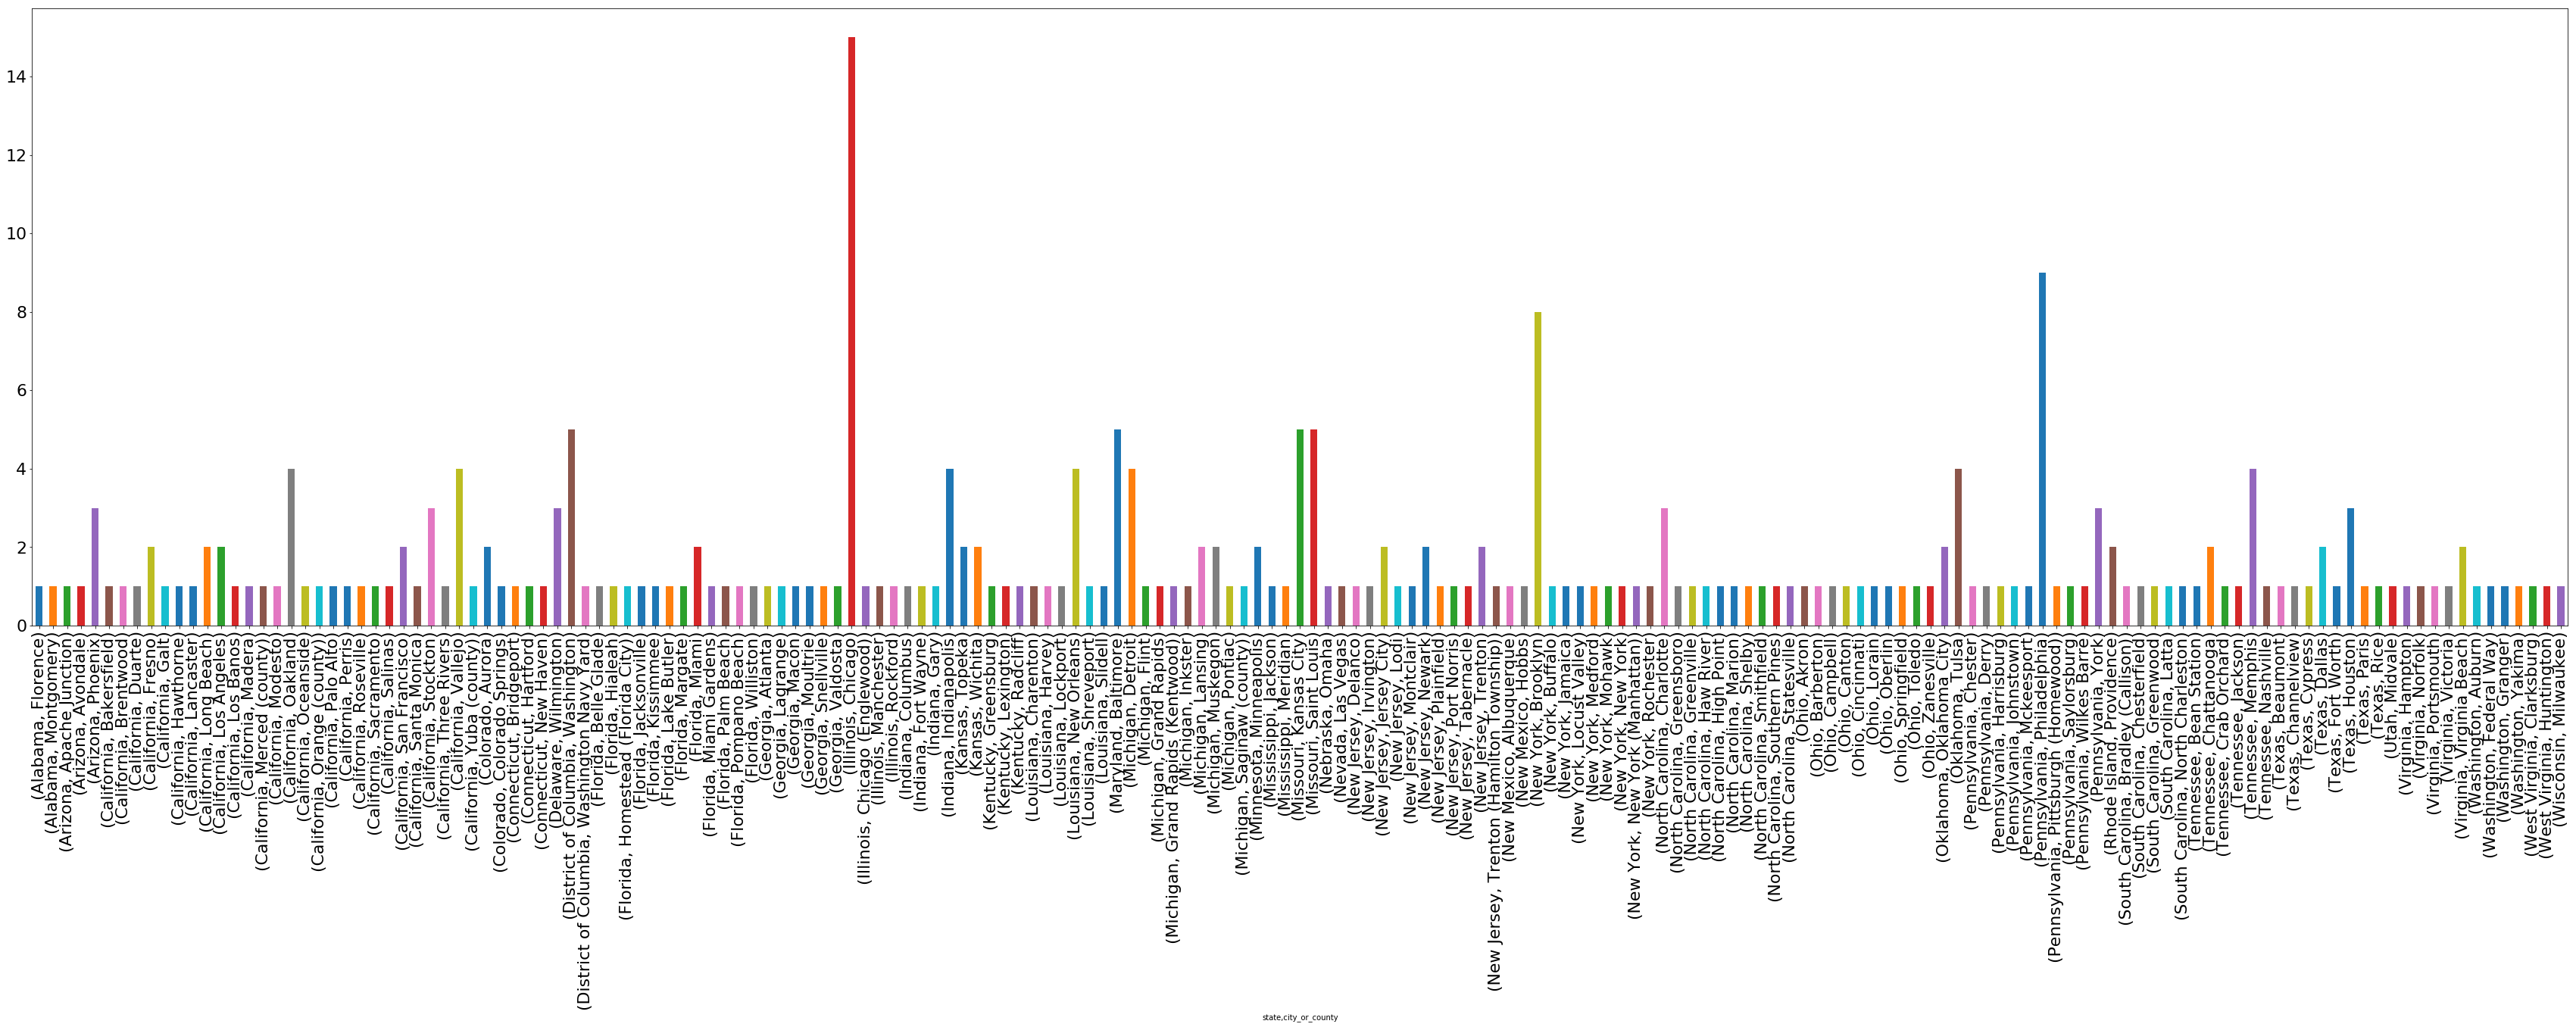

In [23]:
sumInci4.plot(kind='bar',legend=False, figsize=(60,15),fontsize=22)

In [24]:
sumInci3=sumInci1.groupby(['state','city_or_county'])["total_incident_count"].apply(lambda x : x.astype(int).sum()).to_frame('total_incident_count').reset_index()
sumInci3

sumInci2=sumInci1.groupby( [ "year"  , "city_or_county", "total_incident_count"] ).size()
sumInci2


year  city_or_county               total_incident_count
2013  Akron                        1                       1
      Albuquerque                  1                       1
      Apache Junction              1                       1
      Atlanta                      1                       1
      Auburn                       1                       1
      Aurora                       2                       1
      Avondale                     1                       1
      Bakersfield                  1                       1
      Baltimore                    5                       1
      Barberton                    1                       1
      Bean Station                 1                       1
      Beaumont                     1                       1
      Belle Glade                  1                       1
      Bradley (Callison)           1                       1
      Brentwood                    1                       1
      Bridgeport             

In [25]:
sumInci2.shape

(180,)

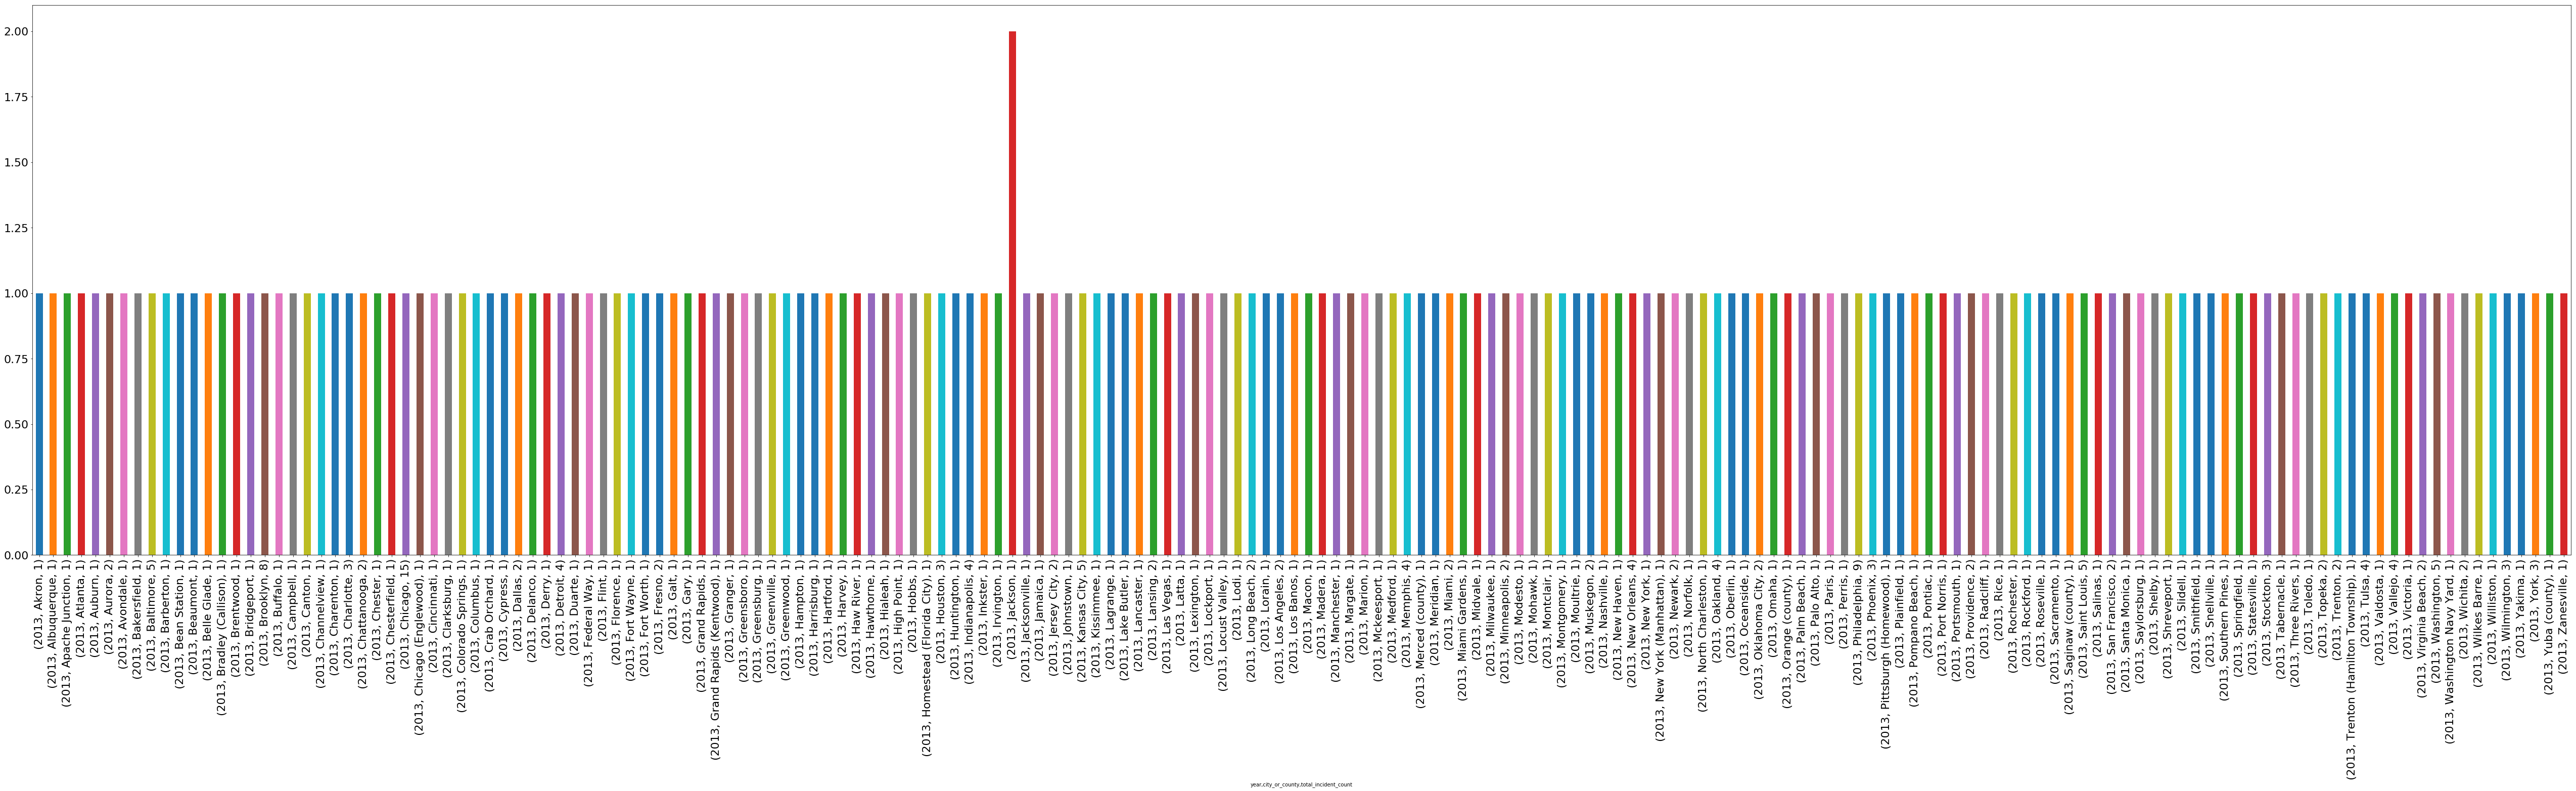

In [26]:
sumInci2.plot(x='city_or_county', y='total_incident_count',kind='bar', figsize=(90,20),fontsize=22)

In [27]:
sumInci1=df1.groupby(['state','year','city_or_county'])["incident_id"].apply(lambda x : x.astype(int).count()).to_frame('total_incident_count').reset_index()

sumInci1

state  year                   city_or_county  total_incident_count
0        Alabama  2013                         Florence                     1
1        Alabama  2013                       Montgomery                     1
2        Alabama  2014                       Adamsville                     3
3        Alabama  2014                            Adger                     1
4        Alabama  2014                        Alabaster                     2
5        Alabama  2014                      Albertville                     4
6        Alabama  2014                   Alexander City                     5
7        Alabama  2014                  Alexander City                      1
8        Alabama  2014                       Aliceville                     1
9        Alabama  2014                        Andalusia                     2
10       Alabama  2014                         Anderson                     1
11       Alabama  2014                         Anniston                    11
12       Alabama  2014                             Arab                     6
13       Alabama  2014                           Ariton                     1
14       Alabama  2014                          Ashford                     2
15       Alabama  2014                          Ashland                     1
16       Alabama  2014                           Athens                     6
17       Alabama  2014                          Attalla                     1
18       Alabama  2014                           Auburn                    17
19       Alabama  2014                          Auburn                      1
20       Alabama  2014                     Autaugaville                     1
21       Alabama  2014                             Axis                     1
22       Alabama  2014                      Bay Minette                     3
23       Alabama  2014                     Bay Minette                      1
24       Alabama  2014                         Bessemer                    12
25       Alabama  2014                        Bessemer                      1
26       Alabama  2014              Bessemer (Hueytown)                     1
27       Alabama  2014                      Bibb County                     1
28       Alabama  2014                       Birmingham                   172
29       Alabama  2014        Birmingham (Center Point)                     1
30       Alabama  2014              Birmingham (Ensley)                     1
31       Alabama  2014          Birmingham (Forestdale)                     1
32       Alabama  2014            Birmingham (Midfield)                     2
33       Alabama  2014                           Blount                     1
34       Alabama  2014                    Blount County                     2
35       Alabama  2014                     Blountsville                     1
36       Alabama  2014                    Blue Mountain                     1
37       Alabama  2014                          Bon Air                     1
38       Alabama  2014                            Booth                     1
39       Alabama  2014                          Brewton                     1
40       Alabama  2014                         Brighton                     1
41       Alabama  2014                        Brundidge                     2
42       Alabama  2014                           Bryant                     2
43       Alabama  2014                   Bullock County                     2
44       Alabama  2014                    Butler County                     3
45       Alabama  2014                           Calera                     3
46       Alabama  2014                          Calhoun                     1
47       Alabama  2014                      Carbon Hill                     1
48       Alabama  2014                     Center Point                     4
49       Alabama  2014                  Chambers County                     1
50       Alabama  2014           